<a href="https://colab.research.google.com/github/sleeptiger/Portfolio/blob/main/Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

from datetime import datetime
from datetime import datetime, timedelta
import datetime
from dateutil.relativedelta import relativedelta

import math
import sys
import re

In [12]:
import yfinance as yf

In [10]:
# https://heecheoldo.tistory.com/103 ( 나스닥/뉴욕증권 거래소/아멕스 Ticker)
# NYSE(뉴욕 증권 거래서 ) csv
# for i in range(5):
#     df['name'][i] =df['name'][i].lower()

ny_code = pd.read_csv('/content/drive/MyDrive/크롤링/NYSE.csv')
ny_code = ny_code[['Symbol', 'Name']]
ny_code.columns = ['symbol', 'name']

for i in range(ny_code.value_counts().sum()):
    ny_code['name'][i] = ny_code['name'][i].lower()


# 나스닥- code-비교 csv
nasdaq_code = pd.read_csv('/content/drive/MyDrive/크롤링/NASDAQ.csv')
nasdaq_code = nasdaq_code[['Symbol', 'Name']]
nasdaq_code.columns = ['symbol', 'name']

for i in range(nasdaq_code.value_counts().sum()):
    nasdaq_code['name'][i] = nasdaq_code['name'][i].lower()

In [88]:
# 달러 금일 
dol_url = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%8B%AC%EB%9F%AC')
dol_url.raise_for_status() # == 응답코드 200 정상 

soup = BeautifulSoup(dol_url.text, 'lxml')
dol = soup.find('span', attrs={"class" : "spt_con dw"}) # find 함수 span element 중에 class 속성이 spt_con dw 것을 찾아줘
dollar = dol.strong.get_text()

p = re.compile("\d*\.?\d+")
a = p.findall(dollar)
th =float(a[0]) * 1000
hu =float(a[1])
dollar = th + hu

print(dollar)
print(type(dollar))

1231.9
<class 'float'>


In [7]:
dt_now = datetime.datetime.now()
one_month_day = dt_now - relativedelta(months=1)

In [102]:
list[0].isupper()

False

In [27]:
abc = [x for x in input('공백을 구분자로 데이터 입력(소문자로 입력해주세요) :').split()]
if abc[0].isupper == True:
    sys.exit()
print('dkanffhfh')

공백을 구분자로 데이터 입력(소문자로 입력해주세요) :Apple
dkanffhfh


In [114]:
# 컬러명 리스트



list = [x for x in input('공백을 구분자로 데이터 입력(소문자로 입력해주세요) :').split()]
# list = ['Apple', 'Tesla', 'NVIDIA','Alphabet','Costco', 'Meta Platforms', 'Amazon'] #['Alphabet', 'Apple', 'Tesla','NVIDIA','Costco'] # 나스닥 list
# list = [] # NYSE
list_code = []

for i in list: # NasdaQ_code 분류기
    major = nasdaq_code[nasdaq_code['name'].str.contains(i)]
    major = major.reset_index(drop=True)
    list_code.append(major.iloc[0]['symbol'])

# 날짜 설정
years = '2023-01-20'

# 오늘 기준 한달 (default)
dt_now = datetime.datetime.now()
one_month_day = dt_now - relativedelta(months=1) 

# DataFrame 생성 및 합성
data = list_code[0]
am_stock = yf.download(data, start = one_month_day)
am_stock = am_stock.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
print('입력 되었습니다.')

if len(list_code) != 1:
    datas = list_code[1:]
    for data in datas:
        db = yf.download(data, start = one_month_day)
        db = db.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
        am_stock = pd.merge(am_stock, db, how='outer', on='Date')
        print('입력되었습니다.')
        
# 컬럼명 지정
am_stock.columns = list
# 인덱스_value 부여
am_stock = am_stock.reset_index()
# 날짜 변경
am_stock['Date'] = am_stock['Date'].dt.date

am_stock.head()


공백을 구분자로 데이터 입력(소문자로 입력해주세요) :apple tesla
[*********************100%***********************]  1 of 1 completed
입력 되었습니다.
[*********************100%***********************]  1 of 1 completed
입력되었습니다.


,Date,apple,tesla
0,2023-01-03,125.070000,108.099998
1,2023-01-04,126.360001,113.639999
2,2023-01-05,125.019997,110.339996
3,2023-01-06,129.619995,113.059998
4,2023-01-09,130.149994,119.769997


In [110]:
# # 달러 가격은 소수점 2자리까지 반올림
# for name in am_stock.columns[1:]:
#     for i in range(am_stock[am_stock.columns[1]].value_counts().sum()):
#         am_stock[name][i] = round(am_stock[name][i],2)

# # 달러를 $ -> ₩ exchange
# for name in am_stock.columns[1:]:
#     for i in range(am_stock[am_stock.columns[1]].value_counts().sum()):
#         am_stock[name][i] = am_stock[name][i] * dollar

<ipython-input-110-4bb16e980c46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am_stock[name][i] = round(am_stock[name][i],2)
<ipython-input-110-4bb16e980c46>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  am_stock[name][i] = am_stock[name][i] * dollar


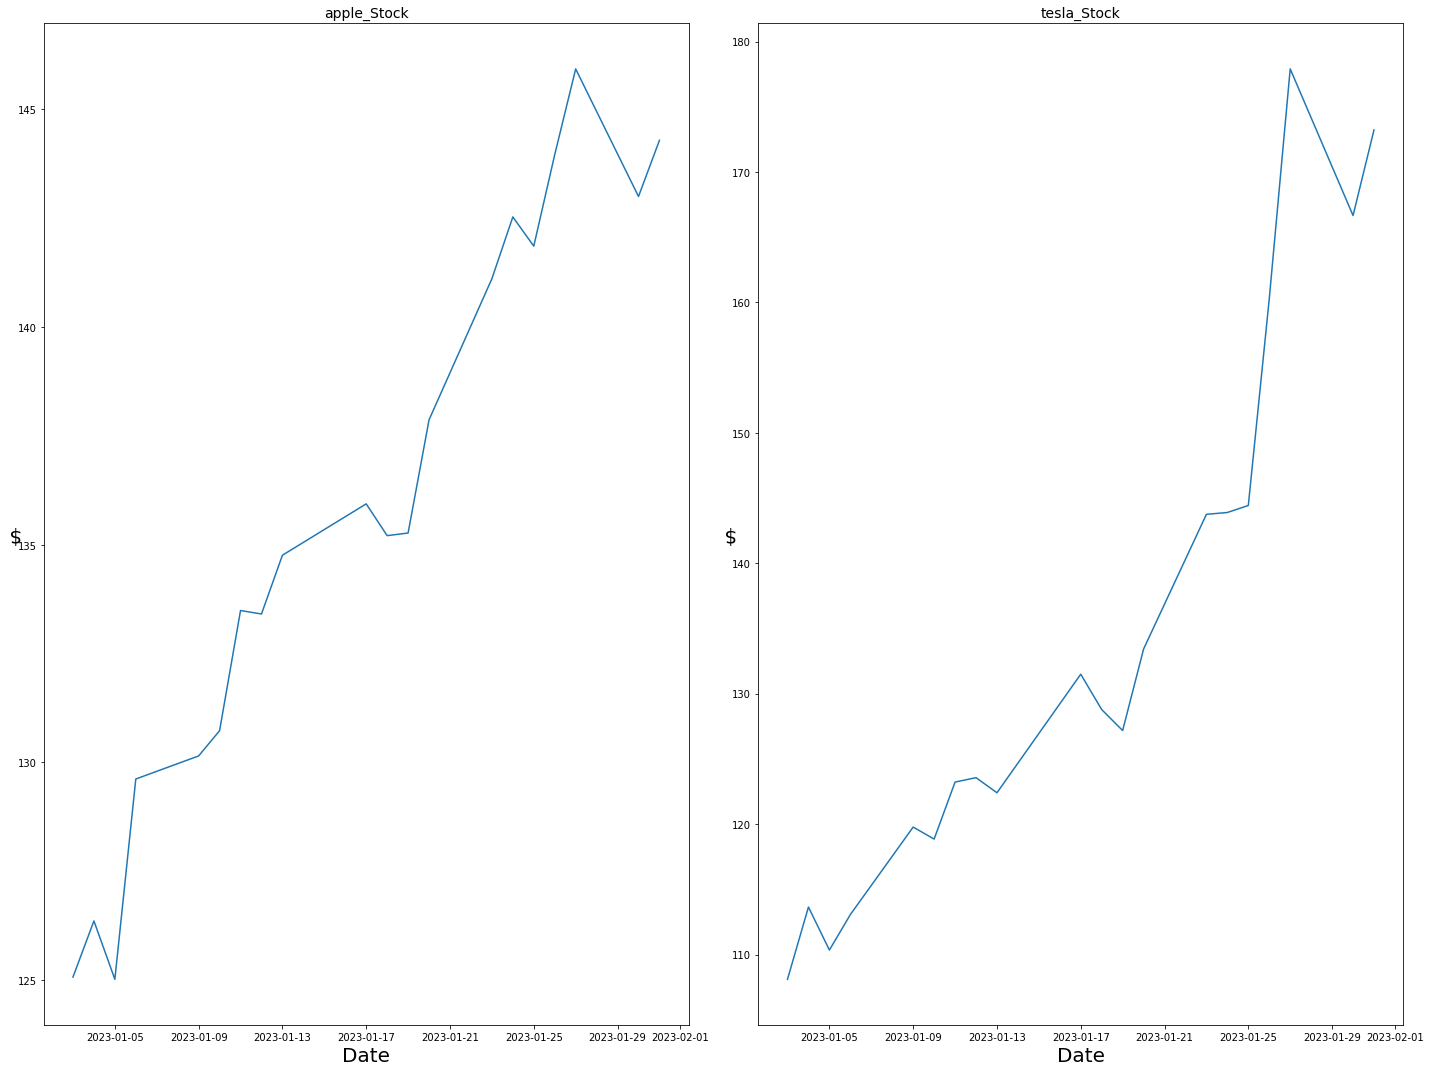

In [116]:
aaist = len(list)
xv = 1

am_stock_date = am_stock.columns[0]

if len(list) == 1:
    plt.figure(figsize=(10, 10))
    plt.plot(am_stock[am_stock_date], am_stock[am_stock.columns[1]])

    plt.ylabel('$')
    plt.xlabel('Date')
    plt.title(am_stock.columns[1] + 'Stock', fontsize=20)

elif len(list) == 2:
    fig, axes = plt.subplots(1,2, figsize=(20,15))

    for i in range(len(list)):
        ax = axes[i]
        sns.lineplot(data=am_stock, x='Date', y = am_stock.columns[1+i], ax=ax)
        ax.set_title(am_stock.columns[i+1] + '_Stock', fontsize=14)
        ax.set_xlabel('Date', fontsize=20)
        ax.set_ylabel('$', rotation=180, fontsize=20)

elif len(list) == 3:
    fig, axes = plt.subplots(2,2, figsize=(20,15))
    xv = 1
    for i in range(len(list)-1):
        for b in range(len(list)-1):
            idx = i*b + xv
            ax = axes[i][b]
            if idx == 5:
                break 
            sns.lineplot(data=am_stock, x='Date', y = am_stock.columns[idx], ax=ax)
            ax.set_title(am_stock.columns[idx] + '_Stock', fontsize=14)
            xv += 1
            ax.set_xlabel('Date', fontsize=20)
            ax.set_ylabel('$', rotation=180, fontsize=20)
elif len(list) == 4:
    fig, axes = plt.subplots(2,2, figsize=(20,15))
    for i in range(len(list)-2):
        for b in range(len(list)-2):
            idx = xv
            if xv == 5:
                break
            ax = axes[i][b]
            sns.lineplot(data=am_stock, x='Date', y = am_stock.columns[idx], ax=ax)
            ax.set_title(am_stock.columns[idx] + '_Stock', fontsize=14)
            xv += 1
            ax.set_xlabel('Date', fontsize=20)
            ax.set_ylabel('$', rotation=180, fontsize=20)

elif len(list) == 5:
    fig, axes = plt.subplots(3,2, figsize=(20,15))

    for i in range(len(list)-2):
        for b in range(len(list)-3):
            idx = xv
            if idx == 6:
                break
            ax = axes[i][b]
            sns.lineplot(data=am_stock, x='Date', y = am_stock.columns[idx], ax=ax)
            ax.set_title(am_stock.columns[idx] + '_Stock', fontsize=14)
            ax.set_xlabel('Date', fontsize=20)
            ax.set_ylabel('$', rotation=180, fontsize=20)
            xv += 1
elif len(list) == 6:
    fig, axes = plt.subplots(3,2, figsize=(20,15))

    for i in range(len(list)-3):
        for b in range(len(list)-4):
            idx = xv
            ax = axes[i][b]
            sns.lineplot(data=am_stock, x='Date', y = am_stock.columns[idx], ax=ax)
            ax.set_title(am_stock.columns[idx] + '_Stock', fontsize=14)
            ax.set_xlabel('Date', fontsize=20)
            ax.set_ylabel('$', rotation=180, fontsize=20)
            xv += 1  
else:
    print('너무 많은 종류에 정보가 입력되었습니다. 정보를 수정해주세요. Max=(6개), 현재 개수:', len(list) )

fig.tight_layout()
plt.show()

In [ ]:
for i in range(len(list)):
    print(i)

0
1
2


In [23]:
len(list)

4

In [13]:
for i in range(len(list)-2):
    for b in range(len(list)-3):

0 0
0 1
1 0
1 1
2 0
2 1


In [44]:
for i in range(len(list)-3):
    for b in range(len(list)-4):
        print(i,b)

0 0
0 1
1 0
1 1
2 0
2 1


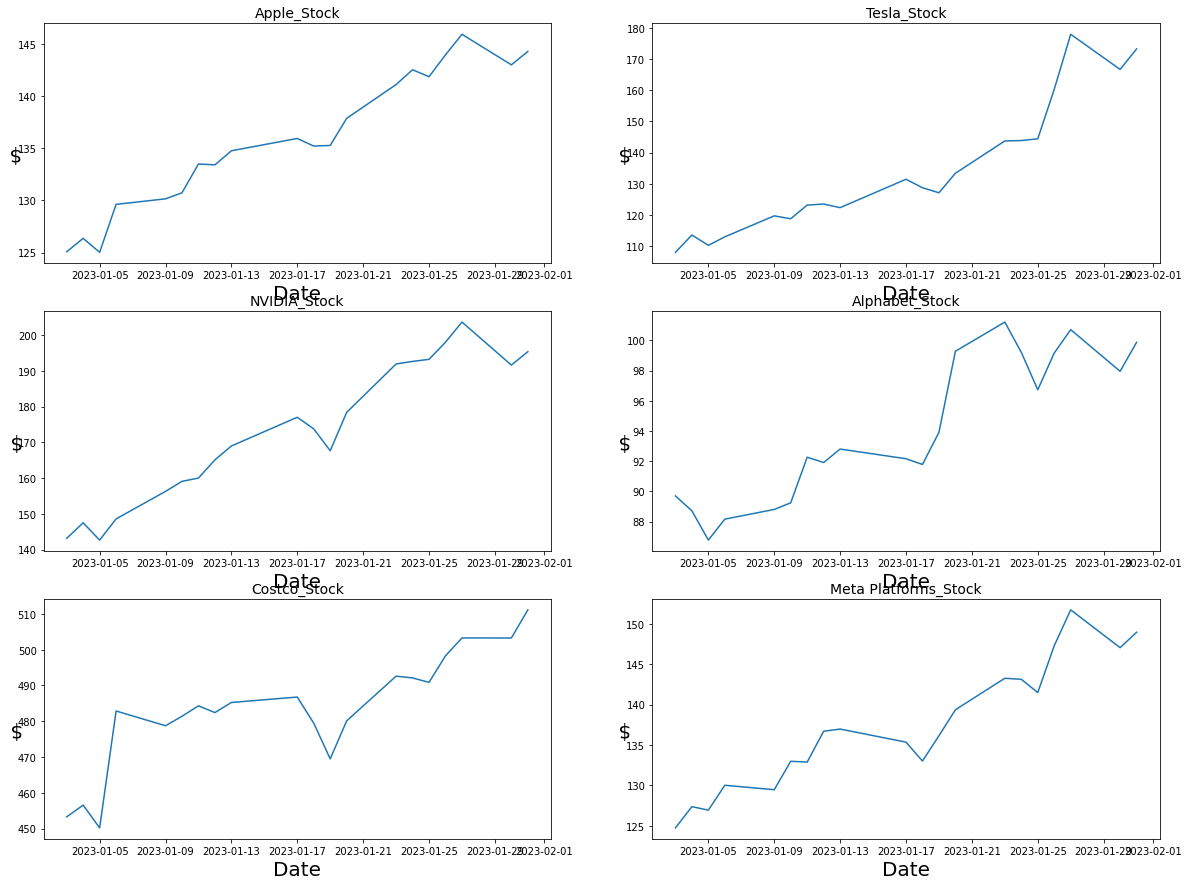

In [45]:
xv = 1
fig, axes = plt.subplots(3,2, figsize=(20,15))

for i in range(len(list)-3):
    for b in range(len(list)-4):
        idx = xv
        ax = axes[i][b]
        sns.lineplot(data=am_stock, x='Date', y = am_stock.columns[idx], ax=ax)
        ax.set_title(am_stock.columns[idx] + '_Stock', fontsize=14)
        ax.set_xlabel('Date', fontsize=20)
        ax.set_ylabel('$', rotation=180, fontsize=20)
        xv += 1 

TypeError: ignored

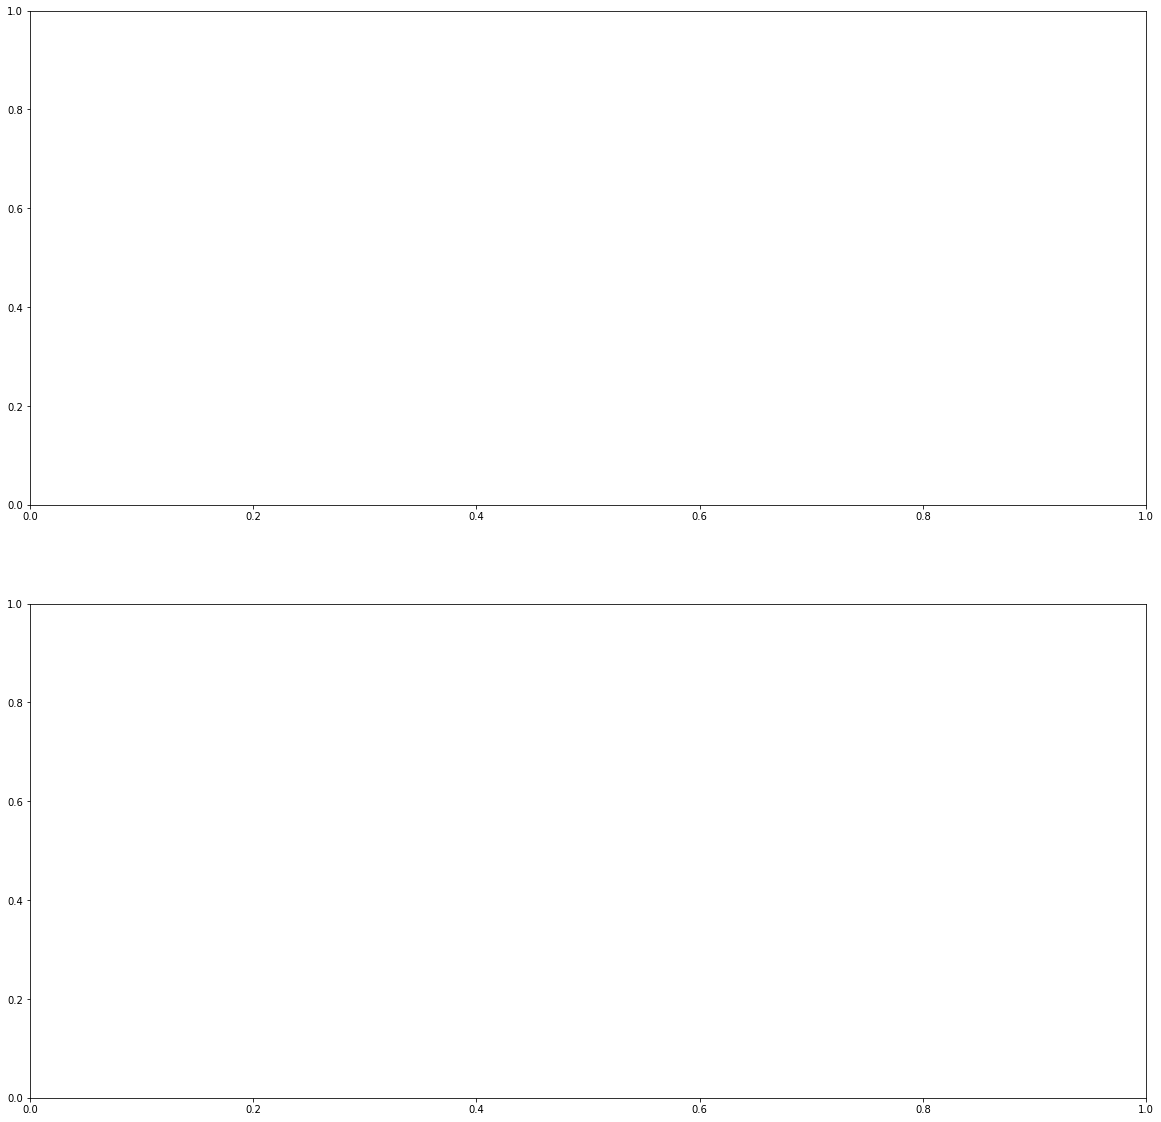

In [ ]:
# # if 절 사용으로 특정 갯수 충족시 출력한다면?
# num = len(list) # 5
# num_st = math.ceil(num / 2) # 3
# col_num = num_st - 1 #2
# am_stock_date = am_stock.columns[0] # Date

# fig, axex = plt.subplots(nrows=num_st, ncols=col_num, figsize=(20,20))
    
# for row in range(num_st): # 0,1,
#     for col in range(col_num): # 0,1,2
#         idx = row * col_num + col # change_values ... 
        
#         if idx < len(list): 
#             ax = axex[row][col]
#             sns.lineplot(x =am_stock[am_stock_date], y =am_stock[am_stock.columns[idx+1]], ax=ax)
#             ax.set_title(list[idx], fontsize=20)
#             ax.set_xlabel('Month_stock')
#             ax.grid(True)              
          
# fig.tight_layout()
# plt.show()

In [ ]:
# # 코드 폼
# plt.figure(figsize=(20, 5))
# plt.plot(am_stock['Date'], am_stock['종목'], label='종목이름')
# plt.title('종목명_stock_graph', fontsize=20)
# plt.legend()
# plt.show()

In [ ]:
# plt.figure(figsize=(20, 5))
# plt.plot(am_stock['Date'], am_stock['google'], label=list[0])
# plt.title('Google_stock_graph', fontsize=20)
# plt.legend()
# plt.show()

In [38]:
df

,Date,apple,tesla
0,2023-01-03,125.070000,108.099998
1,2023-01-04,126.360001,113.639999
2,2023-01-05,125.019997,110.339996
3,2023-01-06,129.619995,113.059998
4,2023-01-09,130.149994,119.769997


In [107]:
df[df.columns[1]].value_counts().sum()

5

In [108]:
for name in df.columns[1:]:
    for i in range(df[df.columns[1]].value_counts().sum()):
        df[name][i] = df[name][i] * dollar 

<ipython-input-108-b2d768569e3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name][i] = df[name][i] * dollar


In [109]:
df.head()

,Date,apple,tesla
0,2023-01-03,154073.733,133168.390
1,2023-01-04,155662.884,139993.116
2,2023-01-05,154012.138,135927.846
3,2023-01-06,159678.878,139278.614
4,2023-01-09,160331.785,147544.663
